In [44]:
import sklearn as sk
import numpy as np
import pandas as pd
import time
from sklearn import tree
from sklearn import ensemble
from sklearn import datasets
from scipy import misc
from copy import deepcopy
from numpy.random import uniform
from numpy.random import normal
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pylab as plt
%matplotlib inline

# RBM implemention

In [52]:
class rbm:
    def __init__(self, learning_rate, mu_moment, batch_size, num_epochs, hidden_count, mode):
        self.learning_rate = learning_rate
        self.mu_moment = mu_moment
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.hidden_count = hidden_count
        self.mode = mode
        
    def sigmoid(self, matrix):
        return 1. / (1. + np.exp(-matrix))
    
    def init_weights(self, vis_count):
        self.w_vh = np.random.normal(0, 0.1, (vis_count, self.hidden_count))
        self.w_v = np.zeros(vis_count)
        self.w_h = np.zeros(self.hidden_count)
        
        self.wu_vh = np.zeros((vis_count, self.hidden_count))
        self.wu_v = np.zeros(vis_count)
        self.wu_h = np.zeros(self.hidden_count)
    
    def fit(self, x):
        self.init_weights(x.shape[1])
        sample_size = x.shape[0]
        shuffle(x)
        
        test_data = x[:(sample_size * 0.1)]
        x = x[(sample_size * 0.1):]
        
        batch_count = (x.shape[0]) // self.batch_size
        start_time = time.time()
        for epoch in range(self.num_epochs):
            print "Epoch num:", epoch+1
            err = []
            shuffle(x)
            for batch in range(batch_count):
                v = x[batch * self.batch_size : (batch + 1) * self.batch_size]
                v_true = deepcopy(v)
                
                self.wu_vh *= self.mu_moment
                self.wu_v *= self.mu_moment
                self.wu_h *= self.mu_moment
                
                #positive phase
                h = self.sigmoid(np.dot(v, self.w_vh) + self.w_h)
                
                self.wu_vh += np.dot(v.T, h)
                self.wu_v += np.sum(v, axis = 0)
                self.wu_h += np.sum(h, axis = 0)
                    
                #sampling
                h = 1. * (np.random.uniform(0, 1, (self.batch_size, self.hidden_count)) < h)
                
                #negative phase 
                if self.mode == 'gaussian':
                    v = np.dot(h, self.w_vh.T) + self.w_v
                elif self.mode == 'bernoulli':
                    v = self.sigmoid(np.dot(h, self.w_vh.T) + self.w_v)
                    
                h = self.sigmoid(np.dot(v, self.w_vh) + self.w_h)
                
                #update weights
                self.wu_vh -= np.dot(v.T, h)
                self.wu_v -= np.sum(v, axis = 0)
                self.wu_h -= np.sum(h, axis = 0)
                
                self.w_vh += self.wu_vh * self.learning_rate / self.batch_size
                self.w_v += self.wu_v * self.learning_rate / self.batch_size
                self.w_h += self.wu_h * self.learning_rate / self.batch_size
                
                err.append(np.mean((v - v_true) ** 2))
                
            print 'Time is:', time.time() - start_time
            print 'Error is:', np.mean(err)
            print 'Error for test data:', np.mean((test_data - self.predict(test_data)) ** 2)
                
    def predict(self, x):        
        h = np.dot(x, self.w_vh)
        h += np.tile(self.w_h, (x.shape[0], 1))
        h = self.sigmoid(h)
        
        h = (np.random.uniform(0, 1, (x.shape[0], self.hidden_count)) < h) * 1.
        
        pred = np.dot(h, self.w_vh.T)
        pred += np.tile(self.w_v, (x.shape[0], 1))
        pred = self.sigmoid(pred)
        return pred

# Read African soil

In [46]:
data = pd.read_csv('training.csv', sep = ',')
data = np.asarray(data)
data = np.delete(data, [3594, 0], axis = 1)
data = np.asarray(data, dtype = np.float)
print data.shape

(1157, 3598)


In [47]:
d = np.std(data, axis = 0)
m = np.mean(data, axis = 0)
data = (data - np.mean(data, axis = 0)) / d

In [48]:
rbm = rbm(learning_rate = 0.005, mu_moment = 0.9, batch_size = 100, num_epochs = 15, hidden_count = 20,\
           mode= 'gaussian')
rbm.fit(data)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:28: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Epoch num: 1
Time is: 1.15365505219
Error is: 0.965404202087
Error for test data: 0.357382269013
Epoch num: 2
Time is: 2.38251209259
Error is: 0.48829007597
Error for test data: 0.329309805279
Epoch num: 3
Time is: 3.61512589455
Error is: 0.470135456686
Error for test data: 0.320212370379
Epoch num: 4
Time is: 4.86481189728
Error is: 0.47426345949
Error for test data: 0.320959382927
Epoch num: 5
Time is: 6.10755705833
Error is: 0.43549734418
Error for test data: 0.321103793279
Epoch num: 6
Time is: 7.34656095505
Error is: 0.40005819693
Error for test data: 0.317436753651
Epoch num: 7
Time is: 8.59432601929
Error is: 0.373334730504
Error for test data: 0.310720196709
Epoch num: 8
Time is: 9.84671092033
Error is: 0.354125196604
Error for test data: 0.30809543454
Epoch num: 9
Time is: 11.0877161026
Error is: 0.336431382193
Error for test data: 0.304353502415
Epoch num: 10
Time is: 12.3187000751
Error is: 0.322418604011
Error for test data: 0.302414200261
Epoch num: 11
Time is: 13.55045199

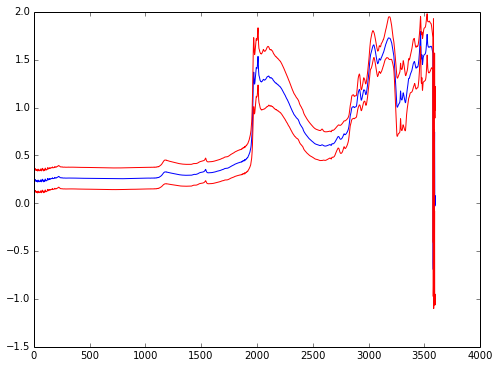

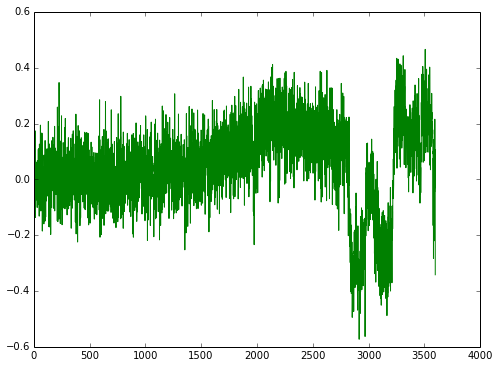

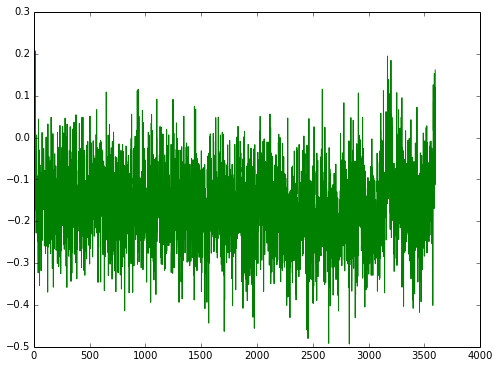

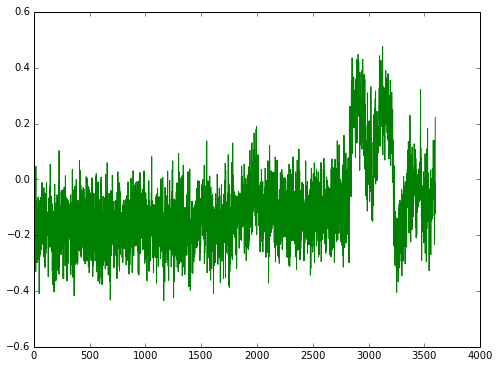

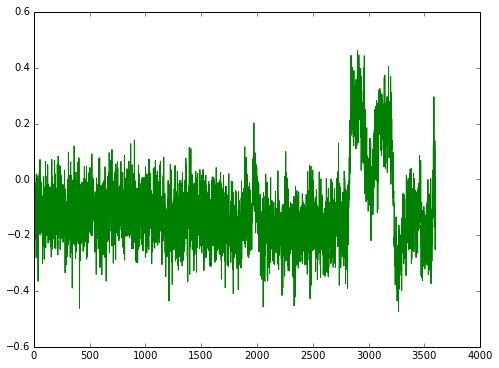

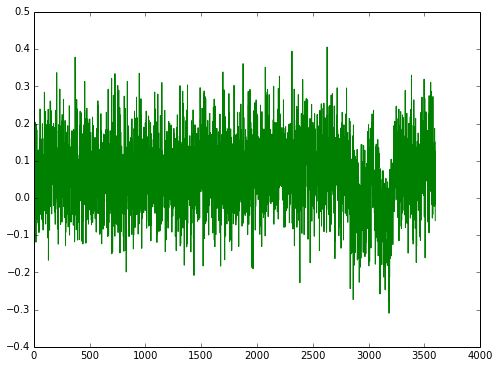

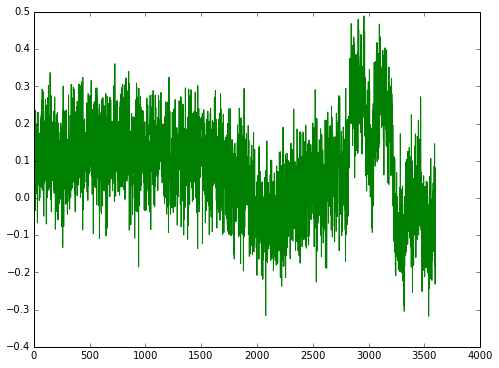

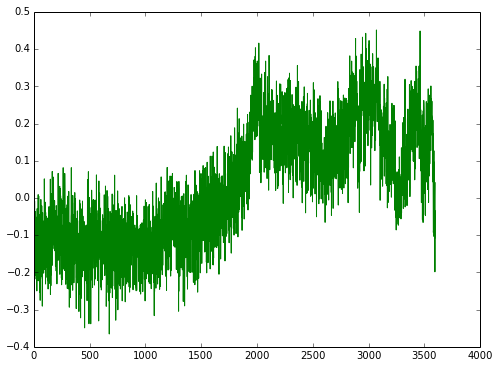

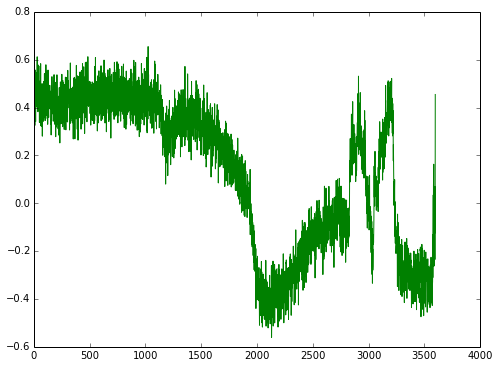

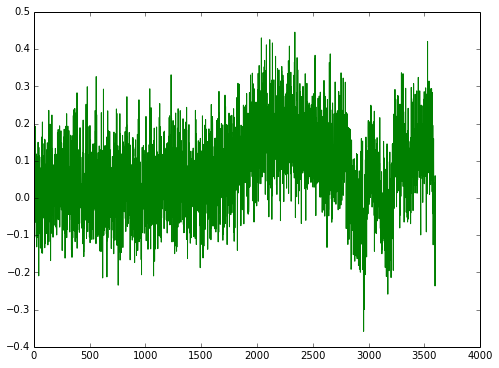

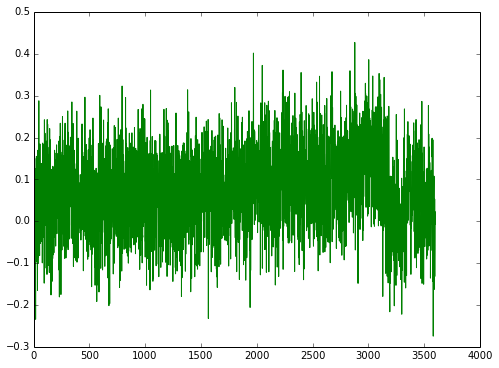

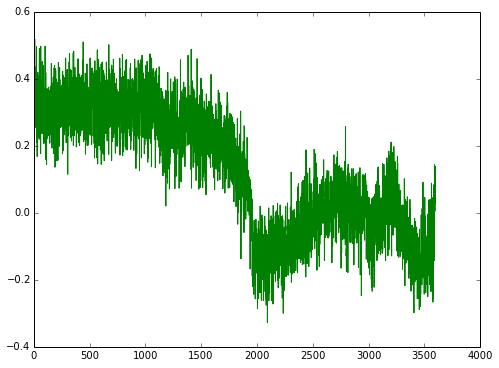

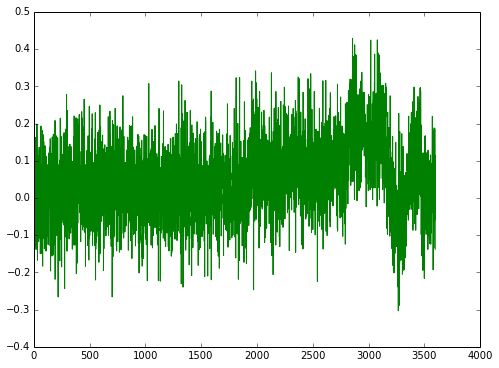

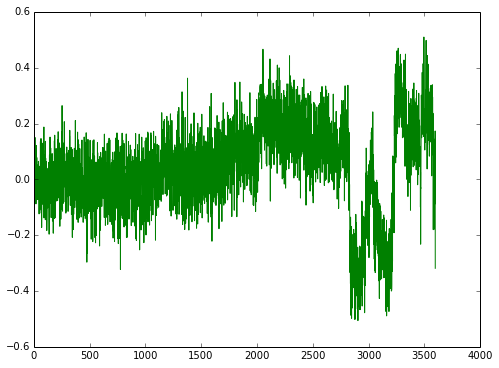

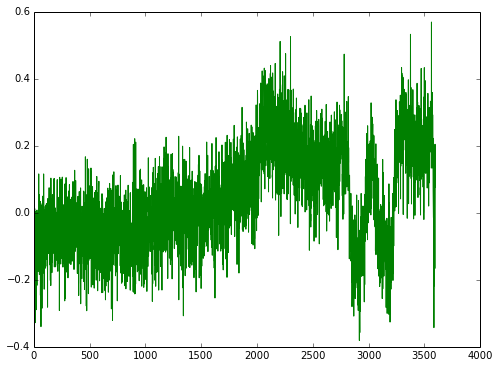

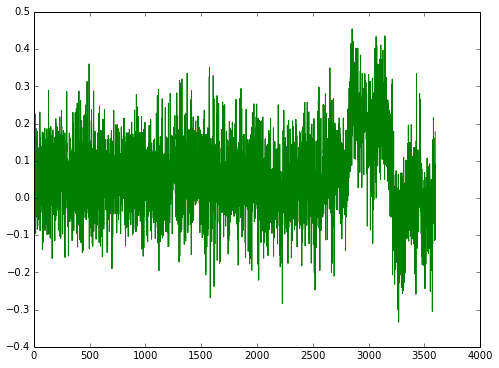

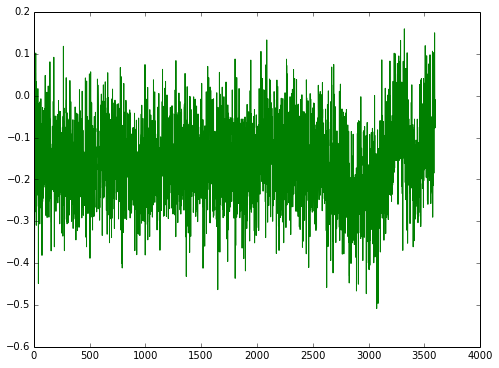

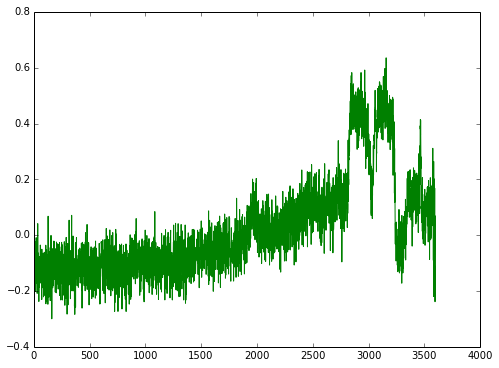

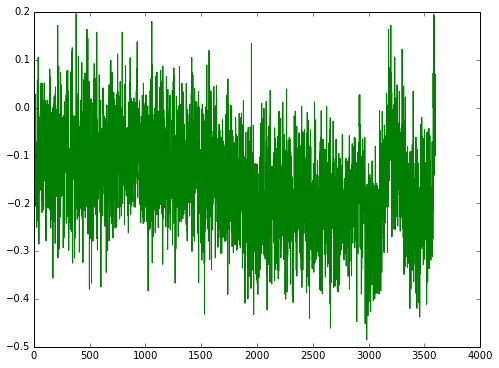

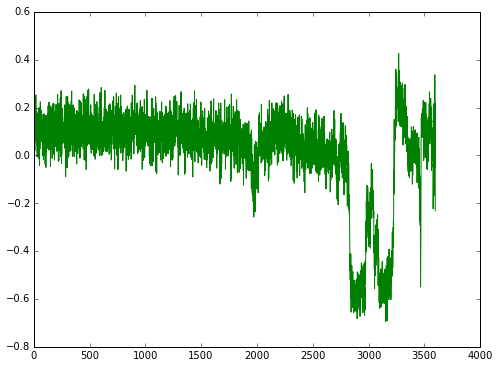

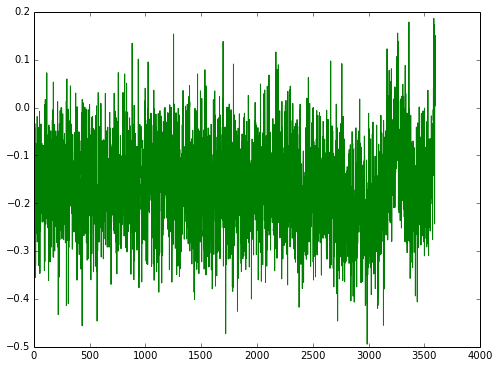

In [49]:
cou_neurons = 20
x = np.arange(3598)
plt.figure(figsize = (8, 6), dpi = 80)
plt.plot(x, m, c = 'b')
plt.plot(x, m + d, c = 'r')
plt.plot(x, m - d, c = 'r')
plt.show()
for i in range(cou_neurons):
    y = rbm.w_vh[:, i]
    plt.figure(figsize = (8, 6), dpi = 80)
    plt.plot(x, y, c = 'g')
    plt.show()

# READ mnist

In [50]:
data = pd.read_csv('Mnist.csv', sep = ',')
data = np.asarray(data, dtype = np.float)
np.random.shuffle(data)
data = data[:10000, 1:]
data /= 255.
print data.shape


(10000, 784)


# RBM FIT

In [53]:
rbm = rbm(learning_rate = 0.1, mu_moment = 0.9, batch_size = 100, num_epochs = 15,\
          hidden_count = 100,  mode = 'bernoulli')
rbm.fit(data)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:28: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Epoch num: 1
Time is: 22.4289939404
Error is: 0.0489515224722
Error for test data: 0.0340464554502
Epoch num: 2
Time is: 46.6851029396
Error is: 0.0321622562721
Error for test data: 0.030385114631
Epoch num: 3
Time is: 71.0982899666
Error is: 0.0293986818648
Error for test data: 0.0285841518365
Epoch num: 4
Time is: 96.1440758705
Error is: 0.027732831581
Error for test data: 0.027479230549
Epoch num: 5
Time is: 120.310439825
Error is: 0.0268236131254
Error for test data: 0.0266858117137
Epoch num: 6
Time is: 144.58747983
Error is: 0.0262430422385
Error for test data: 0.0260728323877
Epoch num: 7
Time is: 169.649222851
Error is: 0.0257237648215
Error for test data: 0.0256049640817
Epoch num: 8
Time is: 195.113423824
Error is: 0.0252766970089
Error for test data: 0.0251740514497
Epoch num: 9
Time is: 220.832605839
Error is: 0.0247817940606
Error for test data: 0.0248507181779
Epoch num: 10
Time is: 244.935284853
Error is: 0.0244336183368
Error for test data: 0.0245830259322
Epoch num: 11

# RBM TEST

Original Image


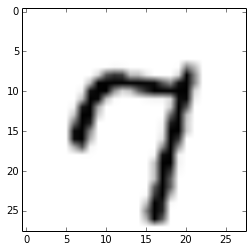

Received Image


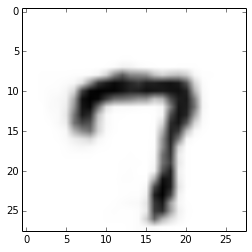

Original Image


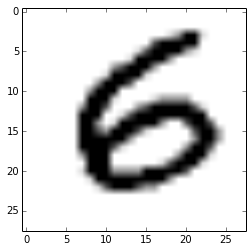

Received Image


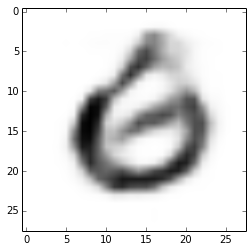

Original Image


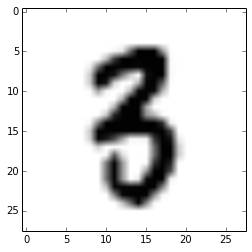

Received Image


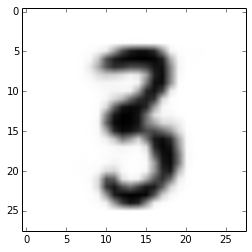

Original Image


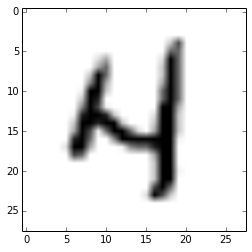

Received Image


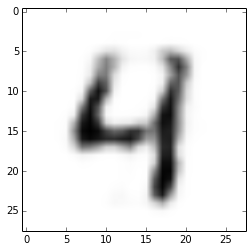

Original Image


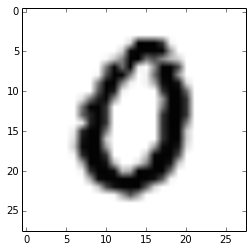

Received Image


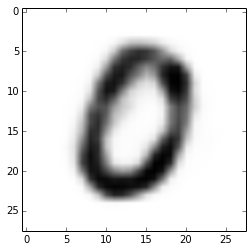

Original Image


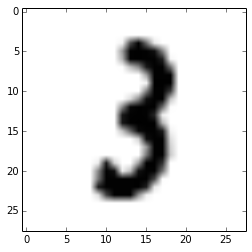

Received Image


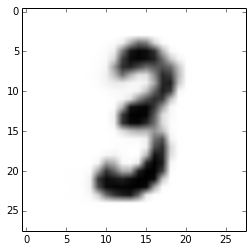

Original Image


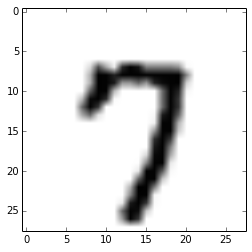

Received Image


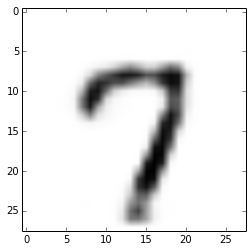

Original Image


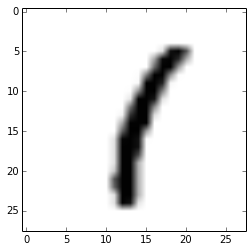

Received Image


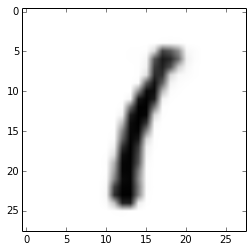

Original Image


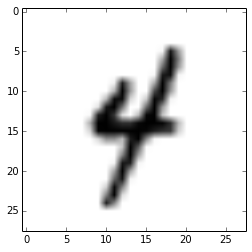

Received Image


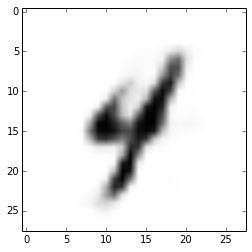

Original Image


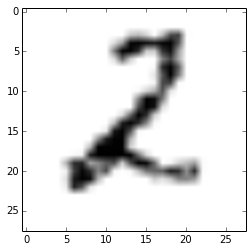

Received Image


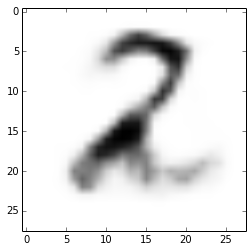

Original Image


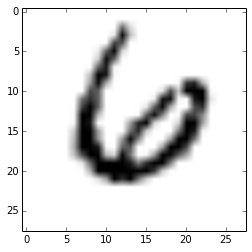

Received Image


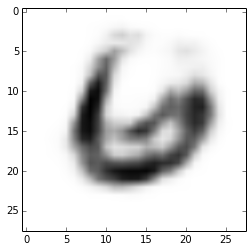

Original Image


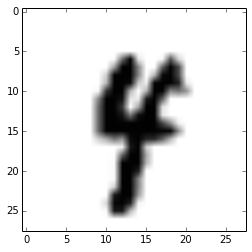

Received Image


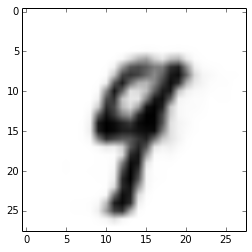

Original Image


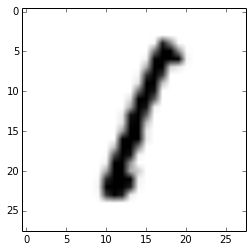

Received Image


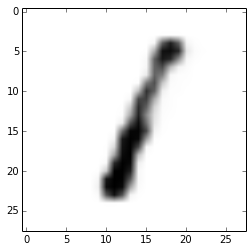

Original Image


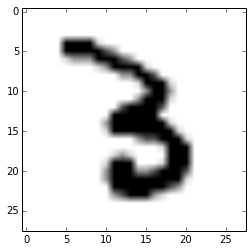

Received Image


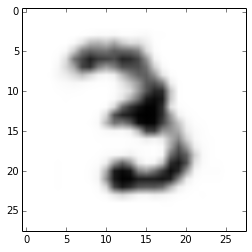

Original Image


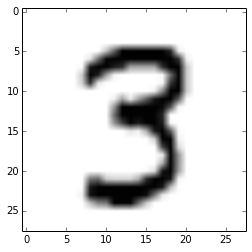

Received Image


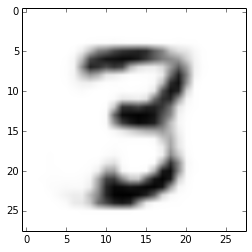

Original Image


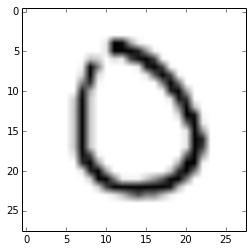

Received Image


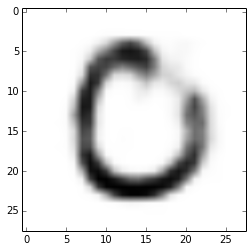

Original Image


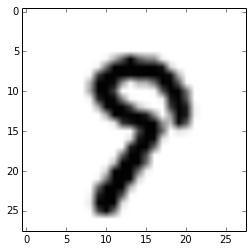

Received Image


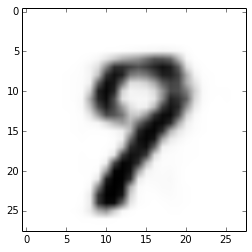

Original Image


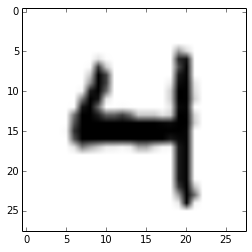

Received Image


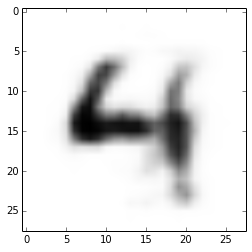

Original Image


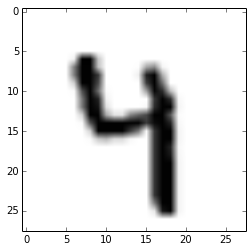

Received Image


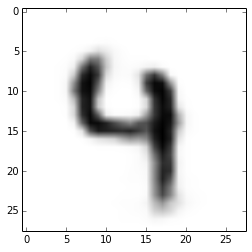

Original Image


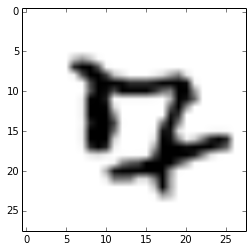

Received Image


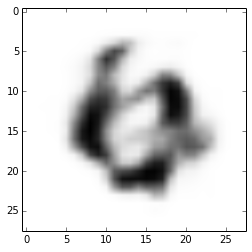

In [55]:
test_count = 20
np.random.shuffle(data)
test_images = data[:test_count]
pred_image = rbm.predict(test_images)
for i in range(test_count):
    print 'Original Image'
    plt.imshow(data[i].reshape(28, 28) * 255., cmap = 'Greys')
    plt.show()
    print 'Received Image'
    plt.imshow(pred_image[i].reshape(28, 28) * 255., cmap = 'Greys')
    plt.show()